# Basic image processing

## aims

In this tutorial you will 
- Load an image from library
- Save an image to file
- Rotate an image
- Magnify an image


## installation

You need to make sure you have skimage installed. To install, run:

with pip:

```
pip install scikit-image
```

or with conda:
```
conda install scikit-image
```

## warnings 

Make sure MPLBACKEND is not defined as `agg` otherwise you will see no graphical output!
To make sure of this, run the following command before invoking `jupyter lab`:

```sh
export MPLBACKEND=
```

## credits

Marcelo Nollmann, April 2021


In [1]:
# loads packages

from tifffile import imsave
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Image saved as: data/face.png


(-0.5, 1023.5, 767.5, -0.5)

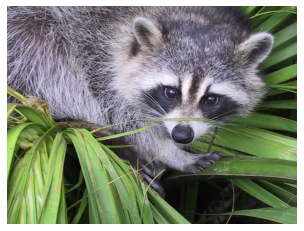

In [21]:
# Loads, displays and saves image 

from scipy import misc
import imageio
faceRGB = misc.face()
fileName='data/face.png'
imageio.imsave(fileName, faceRGB) # uses the Image module (PIL)
print("Image saved as: {}".format(fileName))

#display image 
plt.imshow(faceRGB, vmin=30, vmax=200)        

# Remove axes and ticks

plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

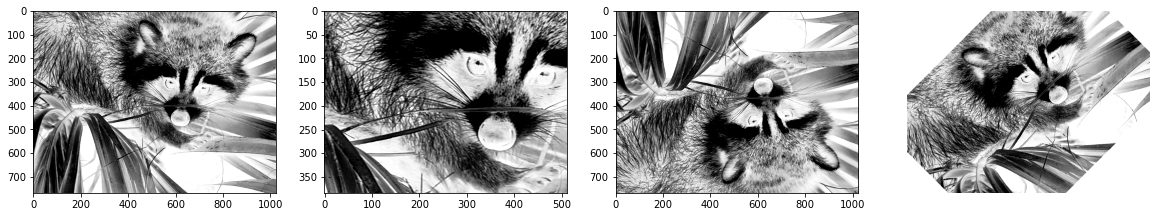

In [43]:
# Zooming and rotating images

from scipy import ndimage
cmap = 'Greys'
face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

# displaying images
fig, axes = plt.subplots(1, 4)
ax = axes.ravel()
fig.set_size_inches((20, 5))
        
ax[0].imshow(face, cmap=cmap, vmin=30, vmax=200)        
ax[1].imshow(crop_face, cmap=cmap, vmin=30, vmax=200)        
ax[2].imshow(flip_ud_face, cmap=cmap, vmin=30, vmax=200)        
ax[3].imshow(rotate_face_noreshape, cmap=cmap, vmin=30, vmax=200)        
plt.axis('off')


(-0.5, 1023.5, 767.5, -0.5)

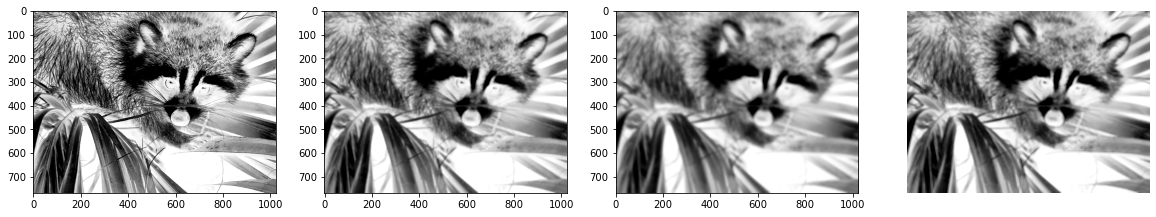

In [44]:
# Smoothing images

from scipy import ndimage
cmap = 'Greys'
face = misc.face(gray=True)

blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)

# uniform filter
local_mean = ndimage.uniform_filter(face, size=11)

# displaying images
fig, axes = plt.subplots(1, 4)
ax = axes.ravel()
fig.set_size_inches((20, 5))
        
ax[0].imshow(face, cmap=cmap, vmin=30, vmax=200)        
ax[1].imshow(blurred_face, cmap=cmap, vmin=30, vmax=200)        
ax[2].imshow(very_blurred, cmap=cmap, vmin=30, vmax=200)        
ax[3].imshow(local_mean, cmap=cmap, vmin=30, vmax=200)        
plt.axis('off')


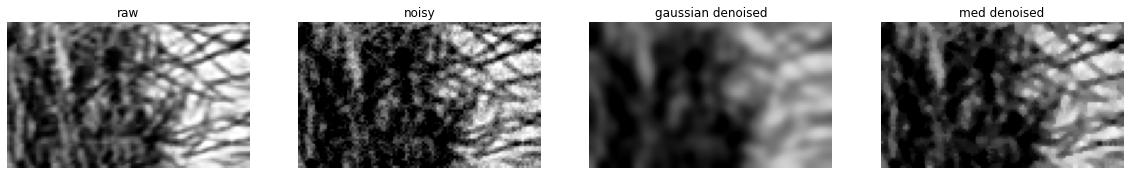

In [59]:
# Denoising image

from scipy import misc
cmap = 'Greys'
face = misc.face(gray=True)
face = face[230:290, 220:320]
noisy = face + 0.9 * face.std() * np.random.random(face.shape)
images=list()

images.append(face)
images.append(noisy)
images.append(ndimage.gaussian_filter(noisy, 2))
images.append(ndimage.median_filter(noisy, 3))

titles = ['raw','noisy','gaussian denoised','med denoised']

# displaying images
fig, axes = plt.subplots(1, len(images))
ax = axes.ravel()
fig.set_size_inches((len(images)*5, 5))

for image,title,axis in zip(images,titles,axes):
    axis.imshow(image, cmap=cmap, vmin=30, vmax=200)        
    axis.axis('off')
    axis.set_title(title)